# IMPORT

In [2]:
import pandas                               as pd
import matplotlib.pyplot                    as plt
import seaborn                              as sns
import numpy                                as np
import statsmodels.api                      as sm
import warnings

from matplotlib                             import colors
from factor_analyzer                        import FactorAnalyzer
from factor_analyzer.factor_analyzer        import calculate_bartlett_sphericity
from sklearn.preprocessing                  import StandardScaler
from sklearn.cluster                        import KMeans
from sklearn.metrics                        import silhouette_score
from scipy.stats                            import pearsonr
from statstests.tests                       import shapiro_francia
from scipy                                  import stats
from scipy.stats                            import boxcox      
from statstests.process                     import stepwise
from scipy.stats                            import norm

warnings.filterwarnings('ignore')

# LOADING DATASET

In [2]:
df = pd.read_csv('Datasets/housing.csv')

# ANÁLISE EXPLORATÓRIA

#### Amostra dos dados

In [3]:
df.sample(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14617    -117.15     32.80                27.0       1937.0           537.0   
14712    -117.04     32.79                23.0       2491.0           350.0   
13312    -117.60     34.08                15.0       2700.0           460.0   
5870     -118.35     34.17                44.0       2572.0           613.0   
14050    -117.13     32.76                33.0       1591.0           461.0   
8729     -118.32     33.85                42.0       3146.0           770.0   
4848     -118.31     34.02                45.0       1423.0           278.0   
4988     -118.31     34.00                52.0       2709.0           642.0   
11286    -117.95     33.79                34.0       2912.0           520.0   
11298    -117.91     33.78                33.0       2729.0           549.0   

       population  households  median_income  median_house_value  \
14617      1211.0       482.0         2.7500             87500.0   
14712       863.0       348.0         6.7196            306800.0   
13312      1432.0       449.0         4.9063            159800.0   
5870       1280.0       570.0         3.5583            232000.0   
14050       794.0       425.0         2.6333            140000.0   
8729       1859.0       740.0         3.5073            234800.0   
4848        822.0       276.0         2.4519             98100.0   
4988       1751.0       613.0         2.1116            122500.0   
11286      1625.0       501.0         4.4667            190600.0   
11298      2223.0       535.0         4.0362            177900.0   

      ocean_proximity  
14617      NEAR OCEAN  
14712       <1H OCEAN  
13312          INLAND  
5870        <1H OCEAN  
14050      NEAR OCEAN  
8729        <1H OCEAN  
4848        <1H OCEAN  
4988        <1H OCEAN  
11286       <1H OCEAN  
11298       <1H OCEAN

#### Tipos de dados

In [4]:
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


#### Verificando a existência de valores Nulos

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Preenchendo valores nulos

In [6]:
df['total_bedrooms'] = df['total_bedrooms'].apply(lambda x: np.mean(df['total_bedrooms']) if pd.isnull(x) else x)

In [7]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

#### Descrição dos dados

In [8]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20640.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        419.266592   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        297.000000    787.000000    280.000000       2.563400   
50%        438.000000   1166.000000    409.000000       3.534800   
75%        643.250000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

#### Matriz de correlação

<AxesSubplot:>

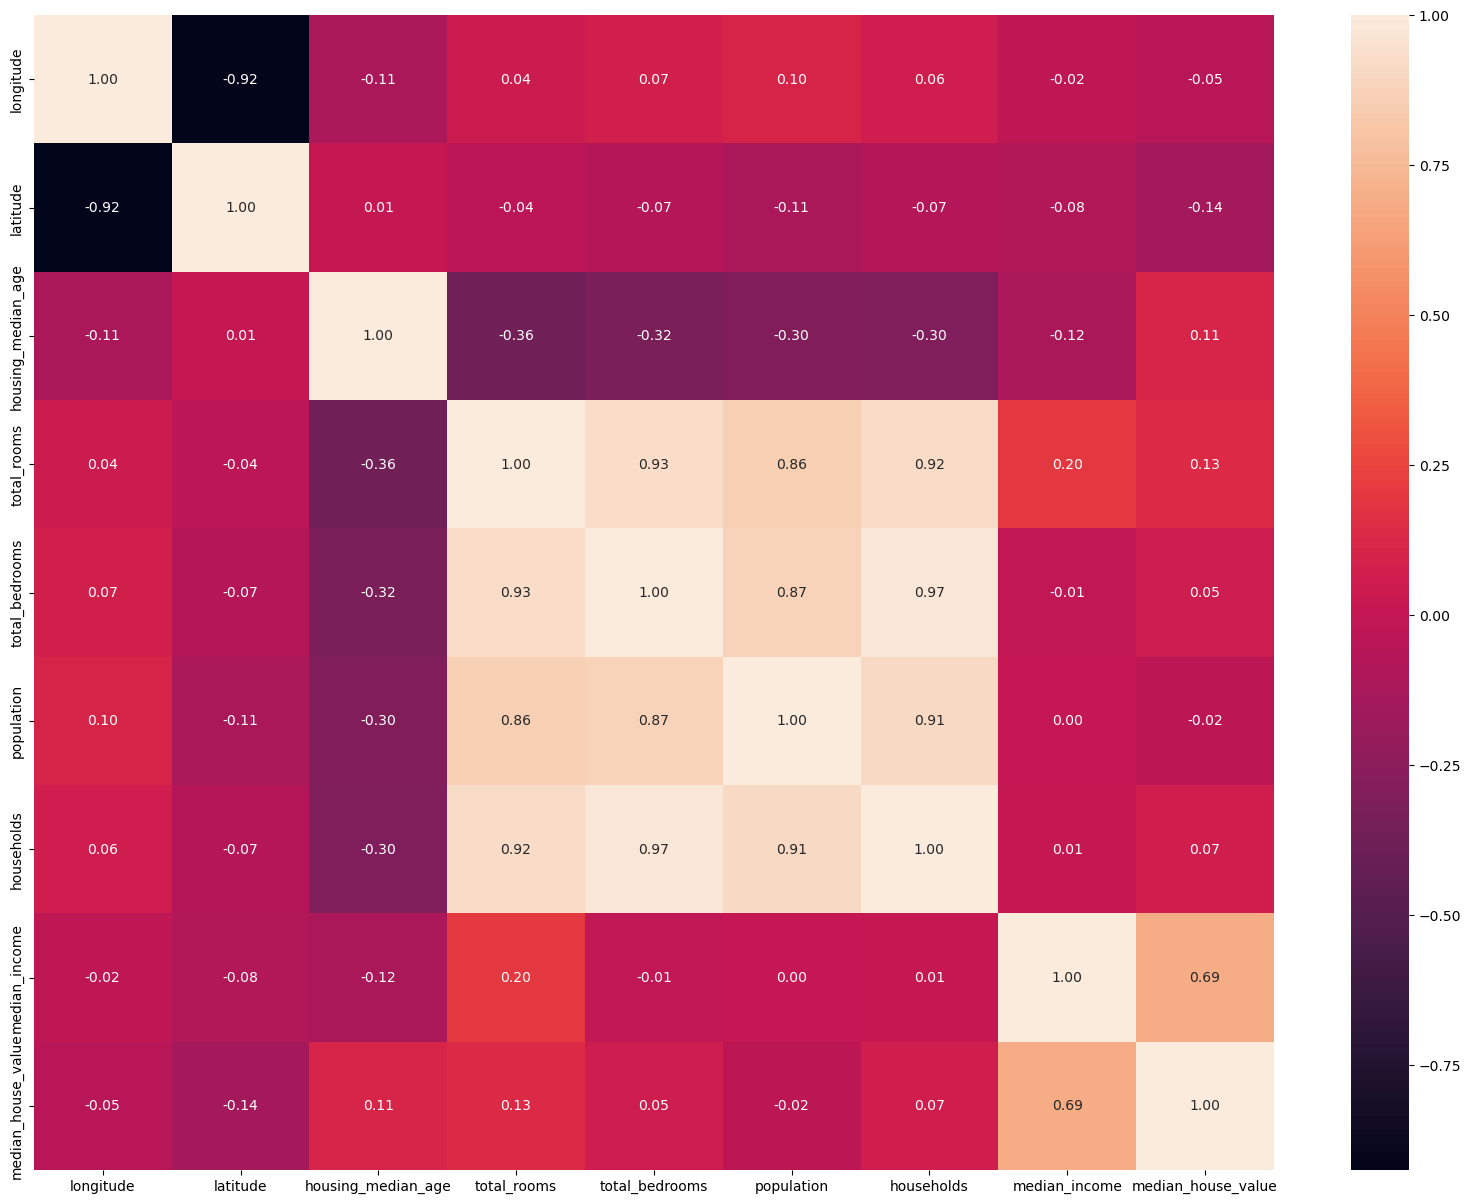

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

#### Dispersão dos dados

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 3000x2000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

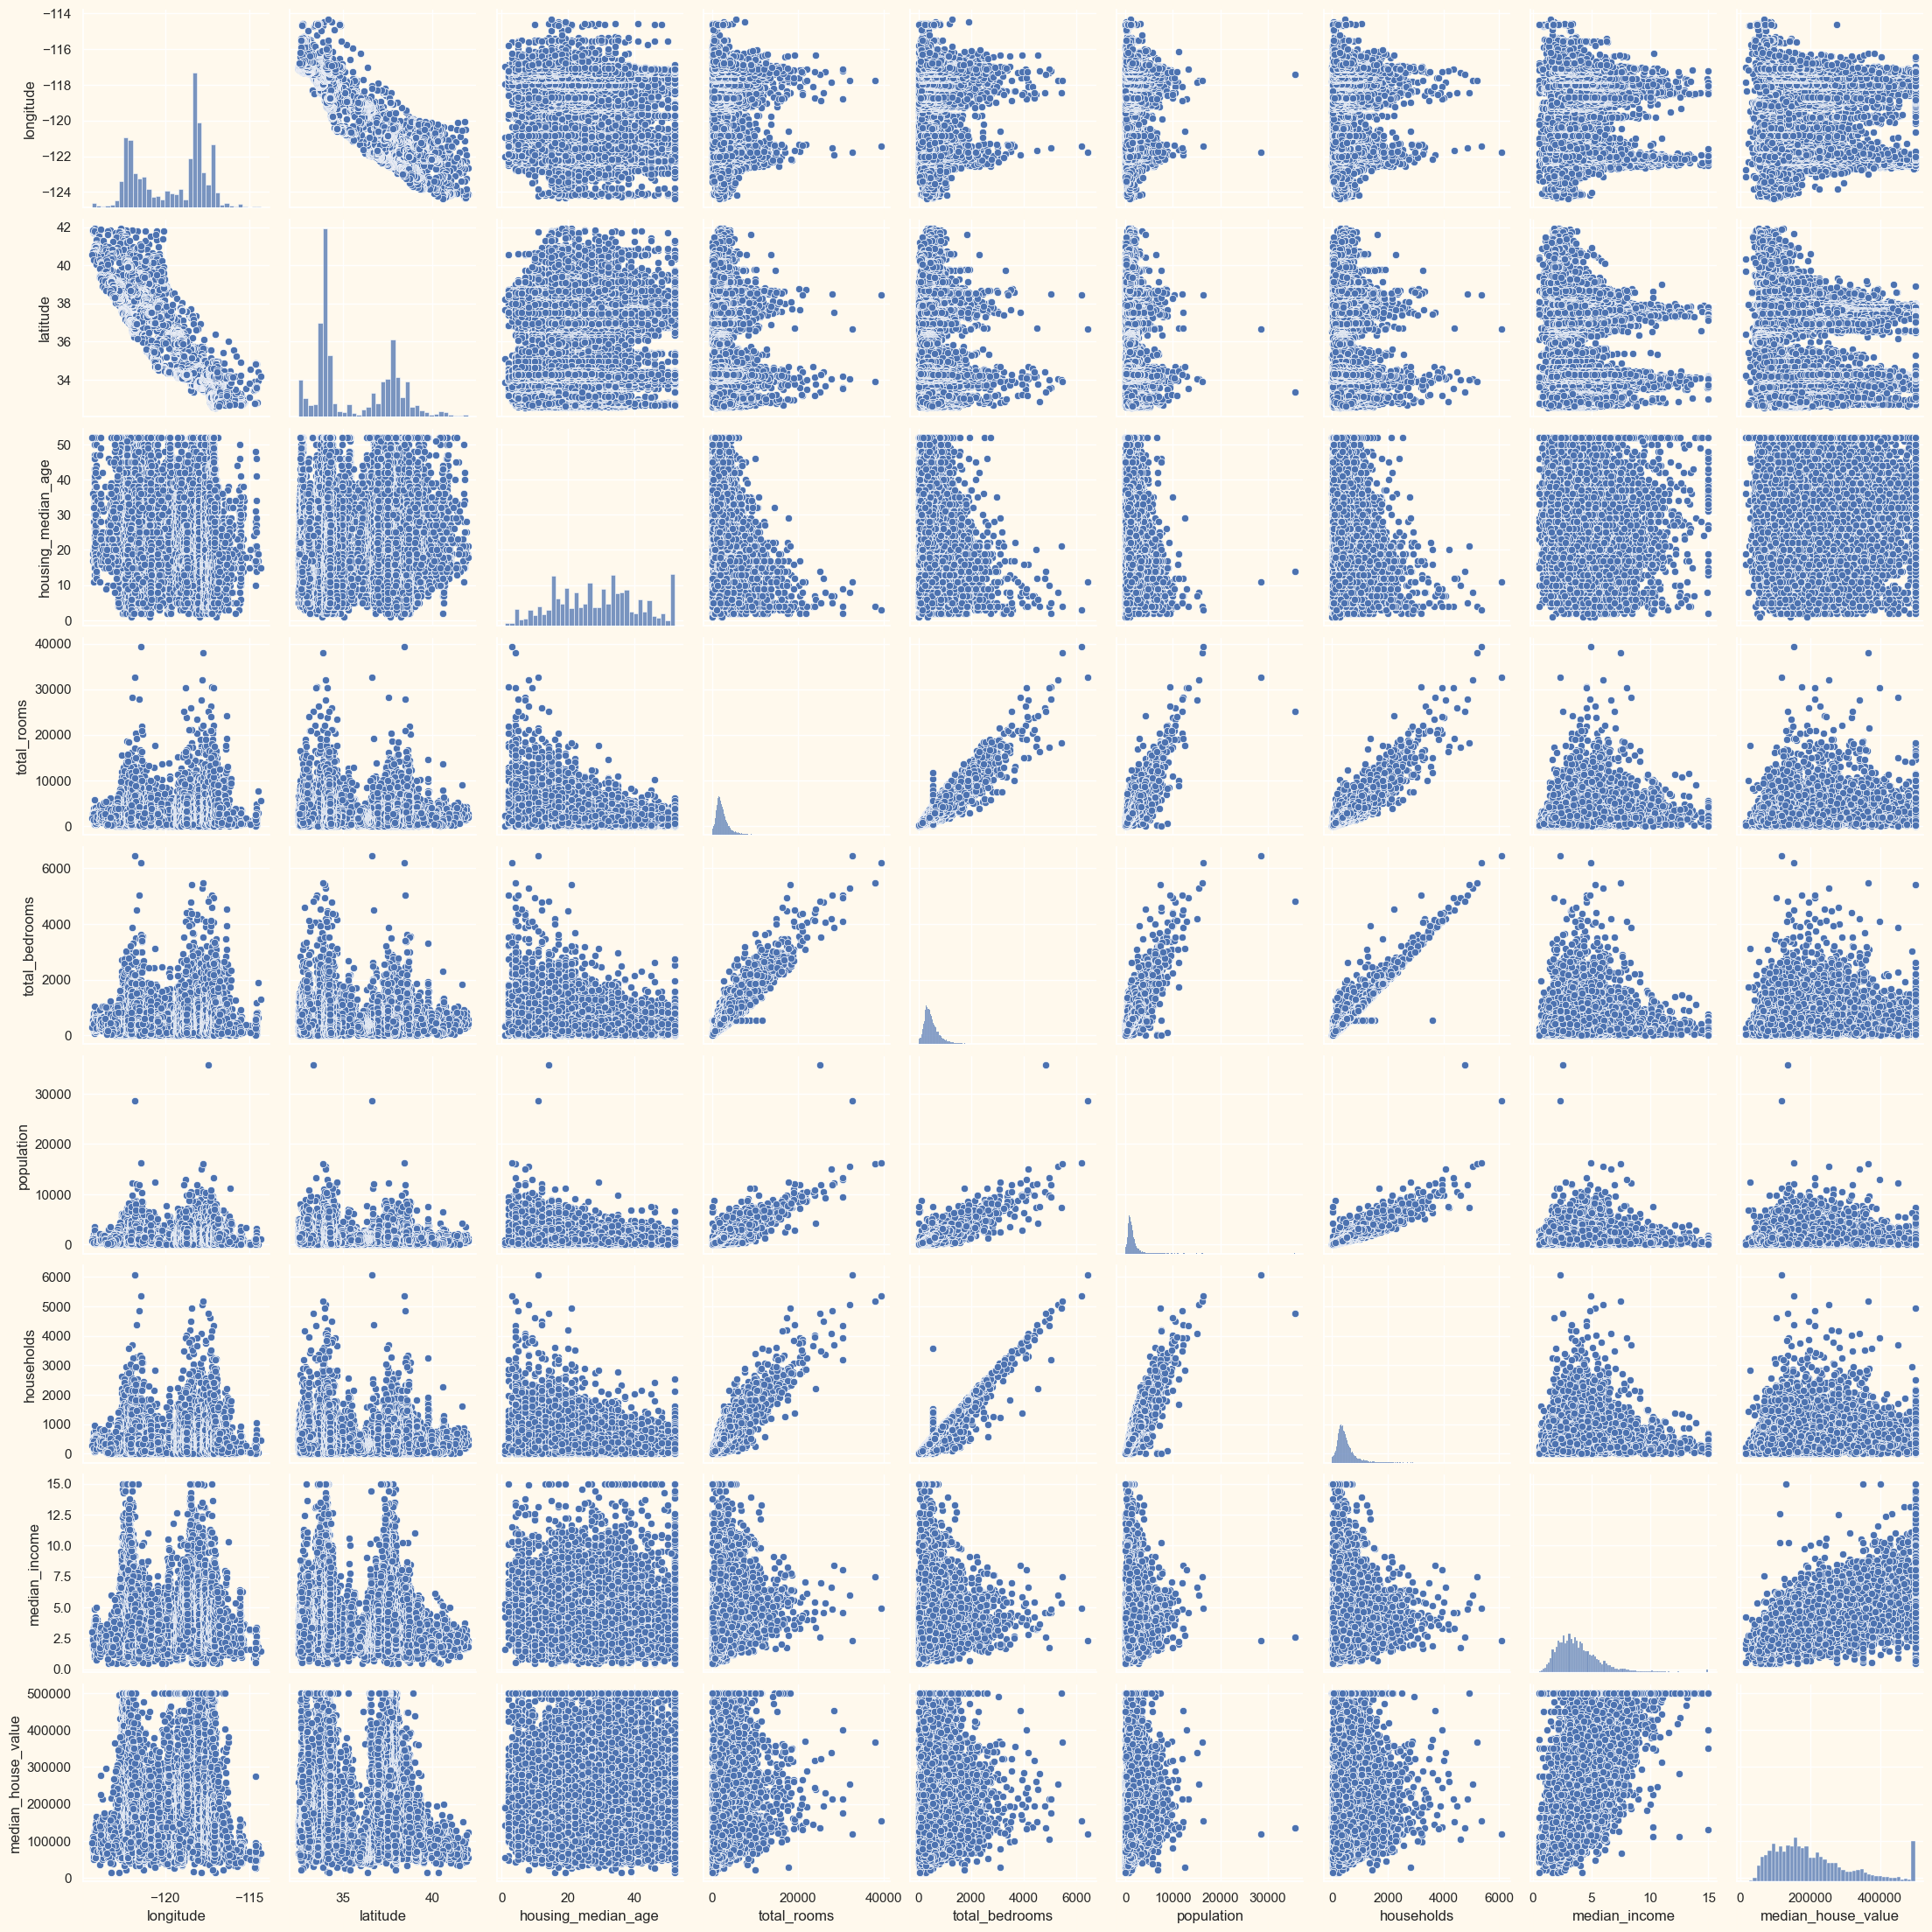

In [10]:
plt.figure(figsize=(30,20))

#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = df.columns
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot],palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

#### Variável Categórica

In [11]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Renomear Variáveis Categóricas

In [12]:
mapa = {'<1H OCEAN':'1_H_OCEAN',
        'INLAND':'INLAND',
        'NEAR OCEAN':'NEAR_OCEAN',
        'NEAR BAY':'NEAR_BAY',
        'ISLAND':'ISLAND'}

df['ocean_proximity'] = df['ocean_proximity'].map(mapa)

In [13]:
df['ocean_proximity'].value_counts()

1_H_OCEAN     9136
INLAND        6551
NEAR_OCEAN    2658
NEAR_BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

#### Boxplot Variáveis Categóricas

<AxesSubplot:ylabel='median_house_value'>

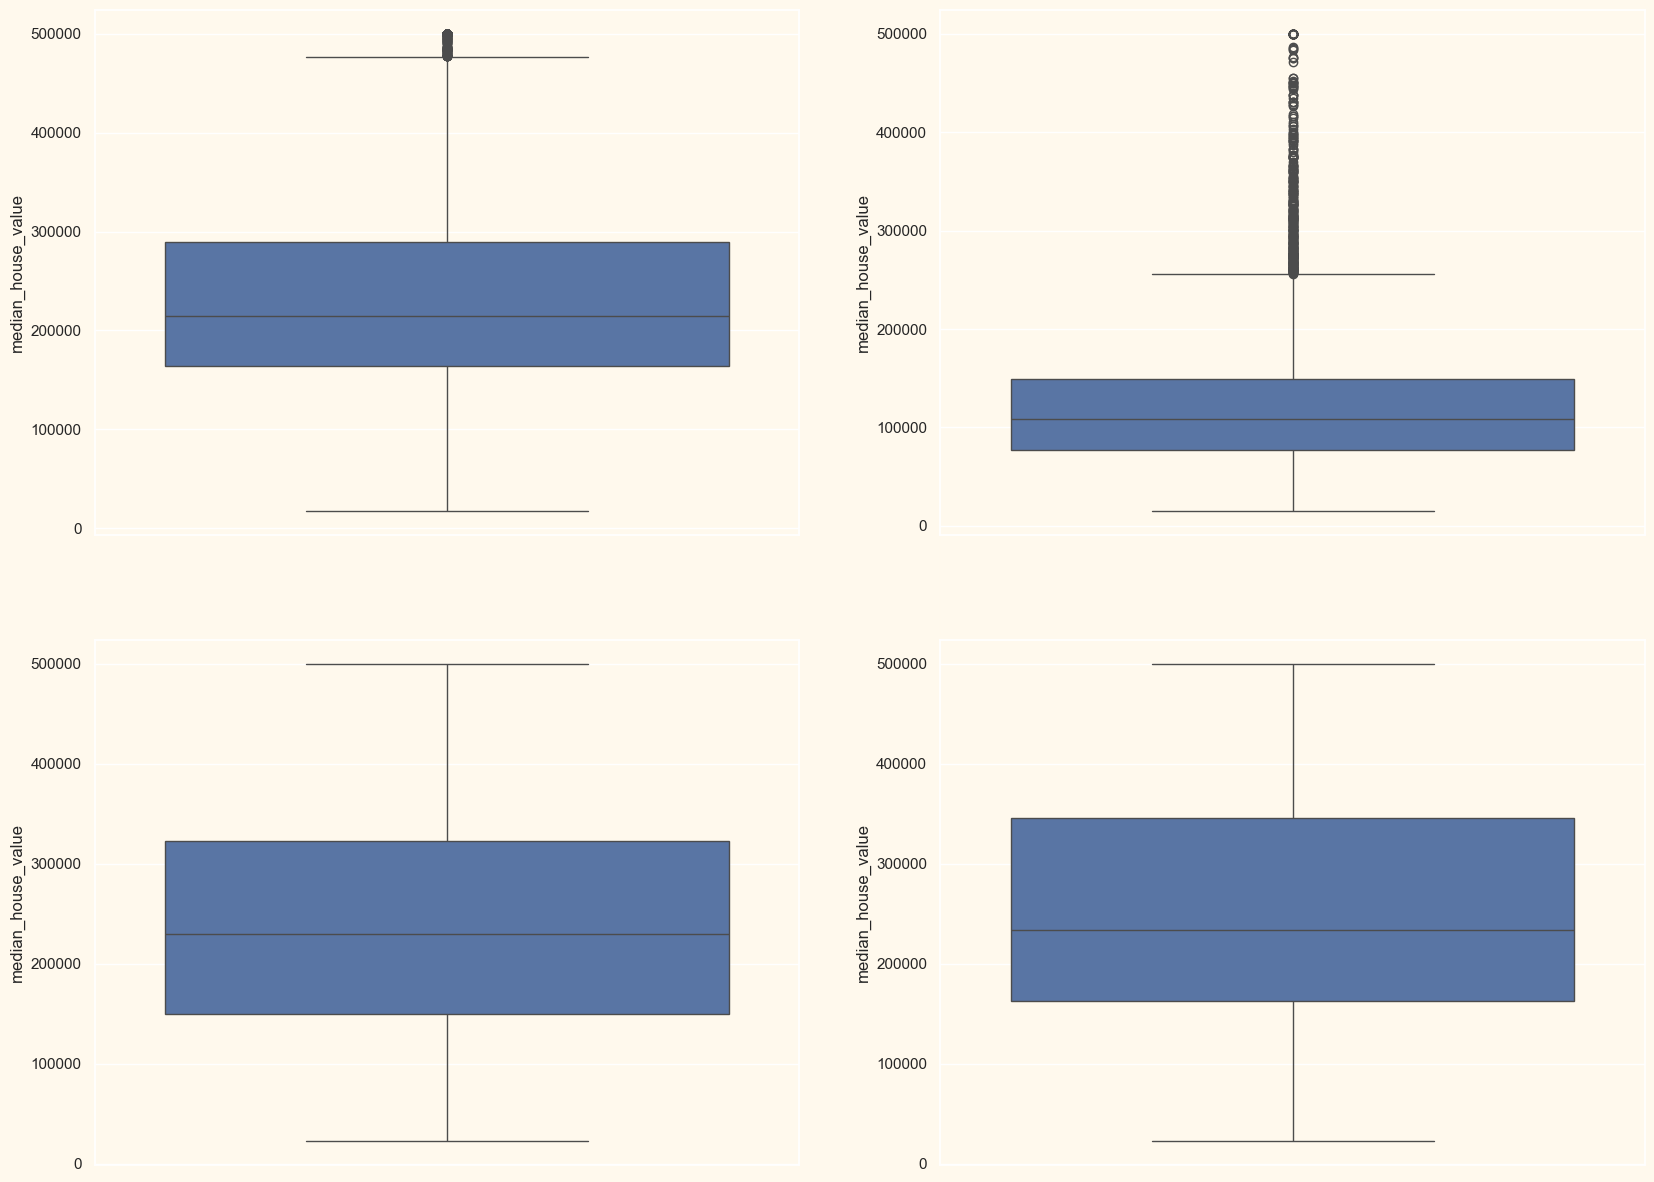

In [14]:
plt.figure(figsize=(20,15))

plt.subplot(2, 2, 1)
sns.boxplot(df[df['ocean_proximity'] == '1_H_OCEAN']['median_house_value'])

plt.subplot(2, 2, 2)
sns.boxplot(df[df['ocean_proximity'] == 'INLAND']['median_house_value'])

plt.subplot(2, 2, 3)
sns.boxplot(df[df['ocean_proximity'] == 'NEAR_OCEAN']['median_house_value'])

plt.subplot(2, 2, 4)
sns.boxplot(df[df['ocean_proximity'] == 'NEAR_BAY']['median_house_value'])

#### Target Value

In [15]:
df['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

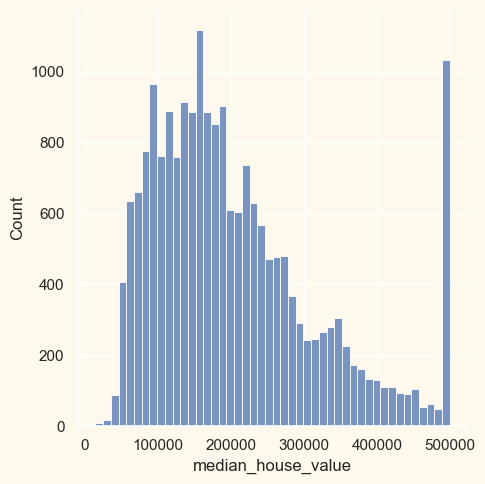

In [16]:
sns.displot(df['median_house_value'])

<AxesSubplot:ylabel='median_house_value'>

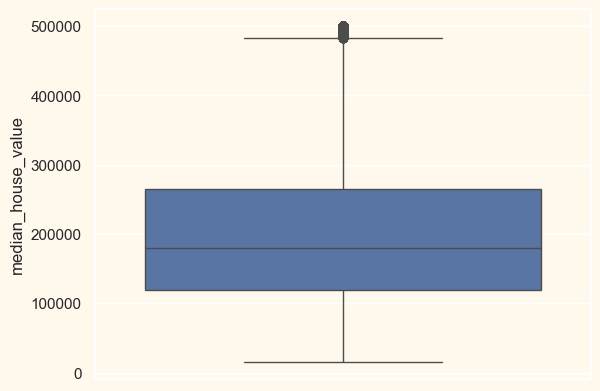

In [17]:
sns.boxplot(df['median_house_value'])

#### Removendo outliers

In [18]:
df[df['median_house_value'] > 450000].shape[0]/df.shape[0]

0.060901162790697676

In [19]:
df = df[df['median_house_value'] <= 450000]

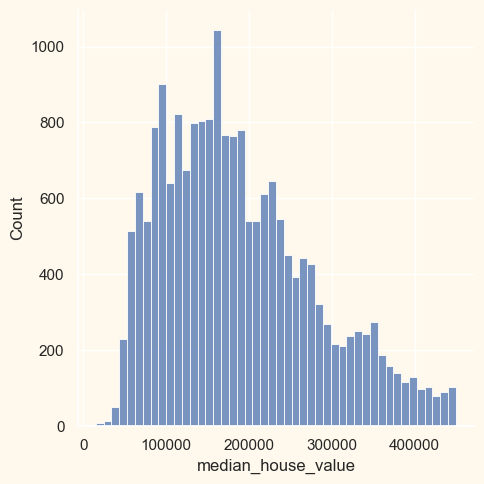

In [20]:
sns.displot(df['median_house_value'])

# ANÁLISE PCA

#### Duplicando o dataframe e removendo a variável alvo

In [21]:
# Variáveis categóricas continuam categóricas, não devemos incluí-las na PCA, por mais que virem dummies
df_pca = df.drop(['median_house_value', 'ocean_proximity'], axis=1)

#### Padronizando os dados

In [22]:
df_pca_std = StandardScaler().fit_transform(df_pca)
df_pca_std = pd.DataFrame(df_pca_std)
df_pca_std.columns = df_pca.columns

#### Teste de esfericidade de Barlett

In [23]:
#O teste de esfericidade de Barlett tem como objetivo verificar se há diferenças entre a matriz de correlação
#com sua matriz identidade, se houver diferença, significa que há variabilidade compartilhada entre os dados,
#dessa forma podemos prosseguir com a análise PCA. Em caso de não houver significância, a análise PCA não é indicada

qui_quadrado, p_value = calculate_bartlett_sphericity(df_pca_std)

#### Teste de hipóteses, p-value

In [24]:
#Hipótese nula ou H0, não há diferenças estatisticamente significantes entre a matriz de correlação 
# e sua matriz identidade
#Hipótese alternativa, há diferenças

if p_value < 0.05:
    print('p_valor: {}, rejeita-se a hipótese nula, há diferença'.format(round(p_value), 2))
elif p_value > 0.05:
    print('p_valor: {}, aceita-se a hipótese nula, não há diferença'.format(round(p_value), 2))

p_valor: 0, rejeita-se a hipótese nula, há diferença


In [25]:
df_pca_std.shape[1]

8

#### Definindo a análise PCA

In [26]:
# Inicialmente devemos extrair todos os autovalores possíveis

fat = FactorAnalyzer(n_factors=8, method='principal', rotation=None).fit(df_pca_std)

#### Obtendo os autovalores (eigenvalues)

In [27]:
# A somatória dos autovalores é igual a quantidade de variáveis, pelo critério de Kayser (raíz latente), devemos
# escolher os autovalores maiores do que 1

autovalores = fat.get_eigenvalues()[0]
df_autovalores = pd.DataFrame(autovalores)
df_autovalores.columns = ['Autovalor']
df_autovalores['Autovalor'] = df_autovalores['Autovalor'].apply(lambda x: format(x, '.2f'))
print(df_autovalores)

  Autovalor
0      3.92
1      1.91
2      1.12
3      0.76
4      0.15
5      0.08
6      0.04
7      0.02


#### Critério de Kayser (Raíz Latente)

In [28]:
# Dentre os autovalores possíveis, devemos escolher os que possuem carga maio ou igual a 1, siginifica que o fator
# sozinho explica mais a variabilidade dos dados do que uma única variável original

fat = FactorAnalyzer(n_factors=3, method='principal', rotation=None).fit(df_pca_std)

#### Eigenvalues, variâncias e variâncias acumuladas

In [29]:
autovalores_fatores = fat.get_factor_variance()
tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.index = ['Autovalor', 'Variância', 'Variância Ac.']
tabela_eigen.columns = [f'Fator {i + 1}' for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen = tabela_eigen.T
print(tabela_eigen)

         Autovalor  Variância  Variância Ac.
Fator 1   3.922469   0.490309       0.490309
Fator 2   1.905527   0.238191       0.728499
Fator 3   1.115335   0.139417       0.867916


In [1]:
# Gráfico da variância dos componentes principais

ax = sns.barplot(data=tabela_eigen, y=tabela_eigen['Variância'], x=tabela_eigen.index, palette='pastel')
plt.xlabel('Fatores')
plt.title ('Variância por Fator')
for barra in ax.containers:
    ax.bar_label(barra, fmt='%.2f', label_type='edge')

NameError: name 'sns' is not defined

#### Determinando as cargas fatoriais

In [31]:
# As cargas fatoriais representam o quanto de variância os fatores conseguem capturar de cada feature
# é a correlação entre o fator e a variável original

cargas_fatoriais = fat.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.index = df_pca_std.columns
tabela_cargas.columns = [f'Fator {i + 1}' for i, v in enumerate(tabela_cargas.columns)]
print(tabela_cargas)

                     Fator 1   Fator 2   Fator 3
longitude           0.151322 -0.968318  0.038867
latitude           -0.147483  0.969322 -0.019283
housing_median_age -0.442652  0.007120  0.529348
total_rooms         0.959396  0.108090 -0.055469
total_bedrooms      0.965663  0.082815  0.145919
population          0.930855  0.032070  0.141625
households          0.970089  0.086693  0.138449
median_income       0.146177 -0.034110 -0.877296


#### Criando função para elevar ao quadrado as cargas fatoriais

In [32]:
def variancia_explicada(data_):
    li = data_.shape[1]
    data_['Total'] = 0
    for i in range(0, li):
        data_.iloc[:, i] =  data_.iloc[:, i].apply(lambda x: np.square(x))
        data_['Total'] = data_['Total'] + data_.iloc[:, i]
    
    for i in range(0, data_.shape[1]):
        data_.iloc[:, i] = data_.iloc[:, i].apply(lambda x: f'{round(x*100, 2)}%')      


In [33]:
# O quadrado das cargas fatoriais é exatamente o percentual da variância capturada pelo fator de cada
# variável original

#variancia_explicada_total = tabela_cargas
#variancia_explicada(variancia_explicada_total)
#print(variancia_explicada_total)

#### Determinando as comunalidades

In [34]:
comunalidade = fat.get_communalities()
tabela_comunalidade = pd.DataFrame(comunalidade)
tabela_comunalidade.index = df_pca_std.columns
tabela_comunalidade.columns = ['Valor']
print(tabela_comunalidade)

                       Valor
longitude           0.962050
latitude            0.961709
housing_median_age  0.476200
total_rooms         0.935201
total_bedrooms      0.960656
population          0.887578
households          0.967757
median_income       0.792180


#### Extraindo os fatores e anexando ao dataframe

In [35]:
fatores = pd.DataFrame(fat.transform(df_pca_std))
fatores.columns = [f'Fator_{i+1}' for i, v in enumerate(fatores.columns)]
df_pca = pd.concat([df_pca.reset_index(drop=True), fatores], axis=1)

<AxesSubplot:>

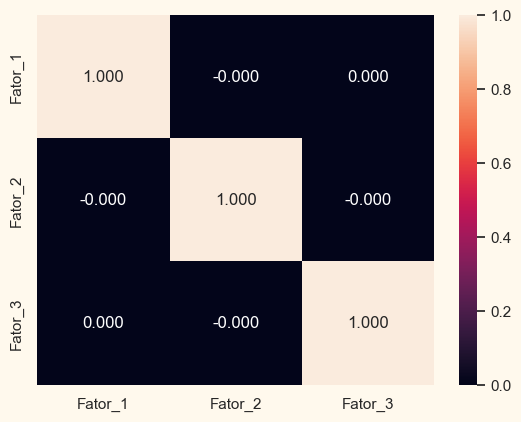

In [36]:
# Os fatores devem ser ortogonais entre si
sns.heatmap(fatores.corr(), annot=True, fmt='.3f')

#### Identificando os scores fatoriais

In [37]:
scores = pd.DataFrame(fat.weights_)
scores.columns = [f'Fator_{i+1}' for i, v in enumerate(scores.columns)]
scores.index = df_pca_std.columns
print(scores)

                     Fator_1   Fator_2   Fator_3
longitude           0.038578 -0.508163  0.034848
latitude           -0.037600  0.508690 -0.017289
housing_median_age -0.112850  0.003736  0.474608
total_rooms         0.244590  0.056724 -0.049733
total_bedrooms      0.246188  0.043460  0.130830
population          0.237314  0.016830  0.126980
households          0.247316  0.045496  0.124132
median_income       0.037267 -0.017901 -0.786576


#### Analisando os scores fatoriais de cada fator extraído

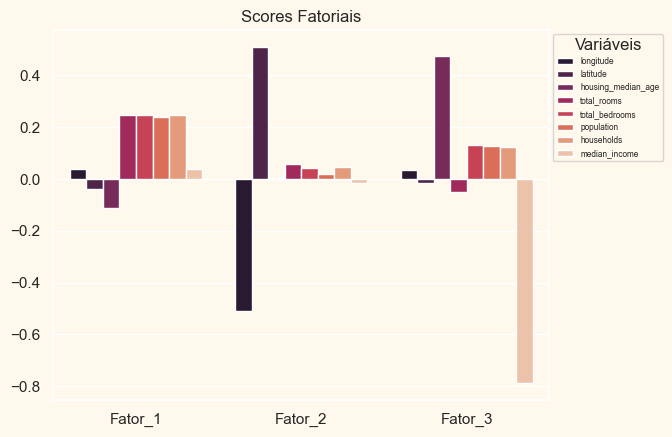

In [38]:
tabela_score_graph = scores.reset_index()
tabela_score_graph = tabela_score_graph.melt(id_vars='index')

sns.barplot(data=tabela_score_graph, x='variable', y='value', hue='index', palette='rocket')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

# CLUSTERING - SEM DUMMYES

#### Definindo o modelo

In [39]:
df_km = df_pca[['Fator_1', 'Fator_2', 'Fator_3']]

In [40]:
kmeans = KMeans(n_clusters=5, random_state=30)
kmeans.fit(df_km)
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 2])

#### Método Ewbol

In [41]:
score_ = []
range_ = range(2, 8)

for i in range_:
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(df_km)
    score_.append(silhouette_score(df_km, kmeans.labels_))

Text(0, 0.5, 'Score')

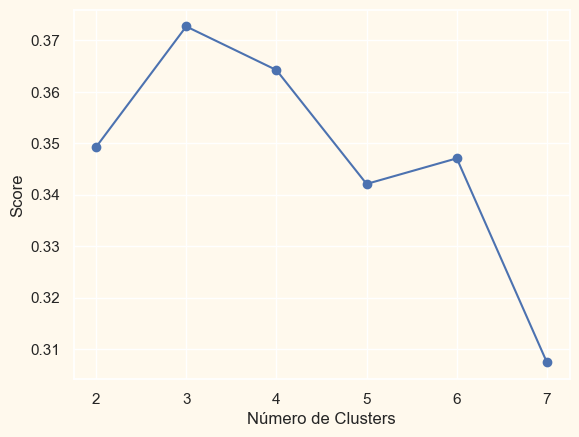

In [42]:
plt.plot(range_, score_, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')

#### Refazendo o modelob

In [43]:
kmeans = KMeans(n_clusters=3, random_state=30).fit(df_km)
clusters = kmeans.labels_
clusters = pd.DataFrame(clusters)
clusters.columns = ['cluster_1'] 

#### Agregando os clusters no df

In [44]:
df_km = pd.concat([df_km, clusters], axis=1)

#### Visualizando os clusters

<AxesSubplot:xlabel='Fator_2', ylabel='Fator_3'>

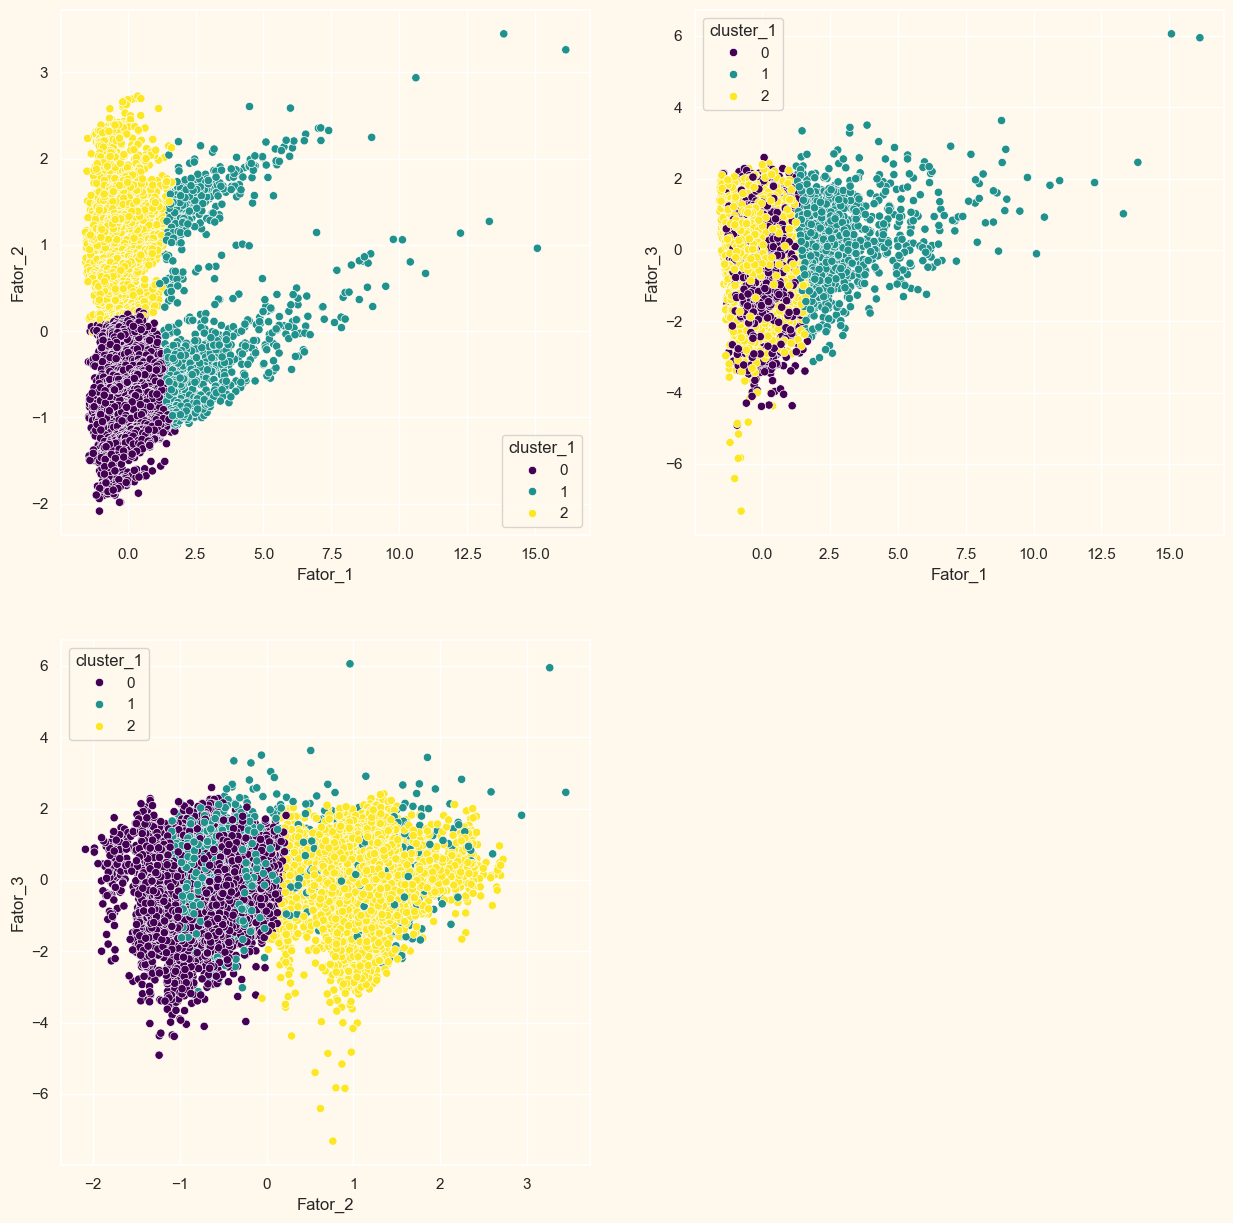

In [45]:
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Fator_1', y='Fator_2', hue='cluster_1', data=df_km, palette='viridis')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Fator_1', y='Fator_3', hue='cluster_1', data=df_km, palette='viridis')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Fator_2', y='Fator_3', hue='cluster_1', data=df_km, palette='viridis')

# CLUSTERIN - COM DUMMY

#### Duplicando o df e criando variáveis dummies

In [46]:
df_km_dummy = df_pca[['Fator_1', 'Fator_2', 'Fator_3']]
df_km_dummy['ocean_proximity'] = df['ocean_proximity']

In [47]:
df_km_dummy = pd.get_dummies(data=df_km_dummy, columns=['ocean_proximity'], drop_first=True)

#### Método Elbow

In [48]:
score_dummy = []
range_ = range(2, 8)

for i in range_:
    kmeans_dummy = KMeans(n_clusters=i, random_state=30)
    kmeans_dummy.fit(df_km_dummy)
    score_dummy.append(silhouette_score(df_km_dummy, kmeans_dummy.labels_))


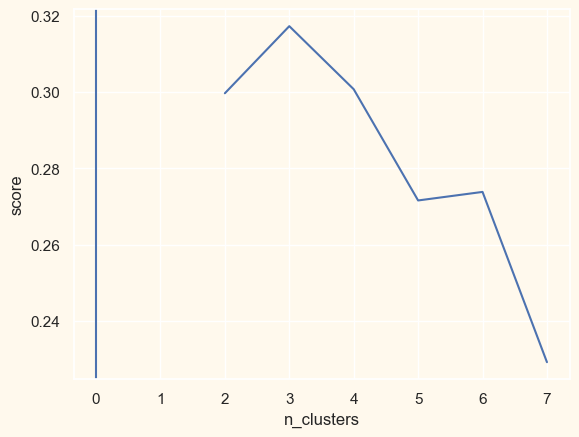

In [49]:
plt.plot(range_, score_dummy)
plt.xlabel('n_clusters')
plt.ylabel('score')
plt.axvline()

#### Refazendo o modelo

In [50]:
kmeans_dummy = KMeans(n_clusters=3, random_state=30)
kmeans_dummy.fit(df_km_dummy)
clusters_dummy = kmeans_dummy.labels_
clusters_dummy = pd.DataFrame(clusters_dummy)
clusters_dummy.columns = ['cluster_2']

In [51]:
df_km_dummy.columns

Index(['Fator_1', 'Fator_2', 'Fator_3', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR_BAY',
       'ocean_proximity_NEAR_OCEAN'],
      dtype='object')

In [52]:
df_cluster_dummy = df_pca[['Fator_1', 'Fator_2', 'Fator_3']]
df_cluster_dummy2 = df_km_dummy[['ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR_BAY', 'ocean_proximity_NEAR_OCEAN']]
df_cluster_dummy = pd.concat([df_cluster_dummy, clusters_dummy, df_cluster_dummy2], axis=1)

<AxesSubplot:>

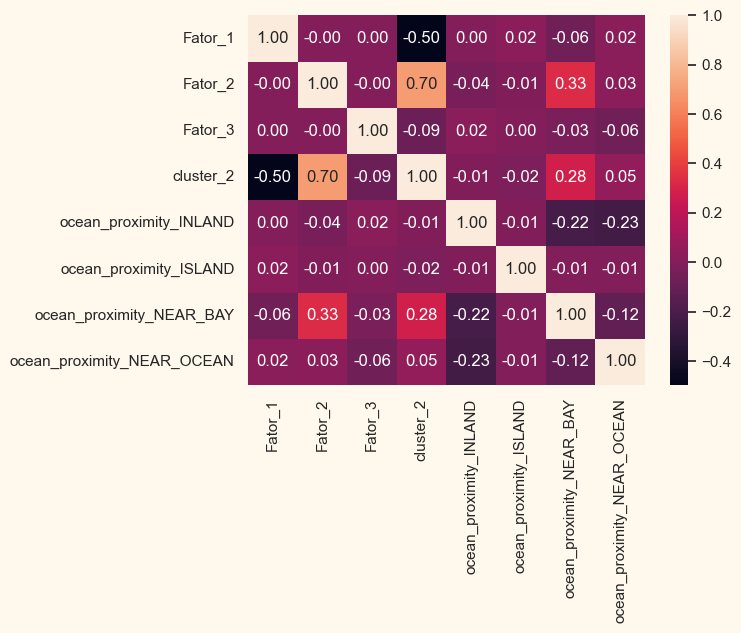

In [53]:
sns.heatmap(df_cluster_dummy.corr(), annot=True, fmt='.2f')

<AxesSubplot:xlabel='Fator_2', ylabel='Fator_3'>

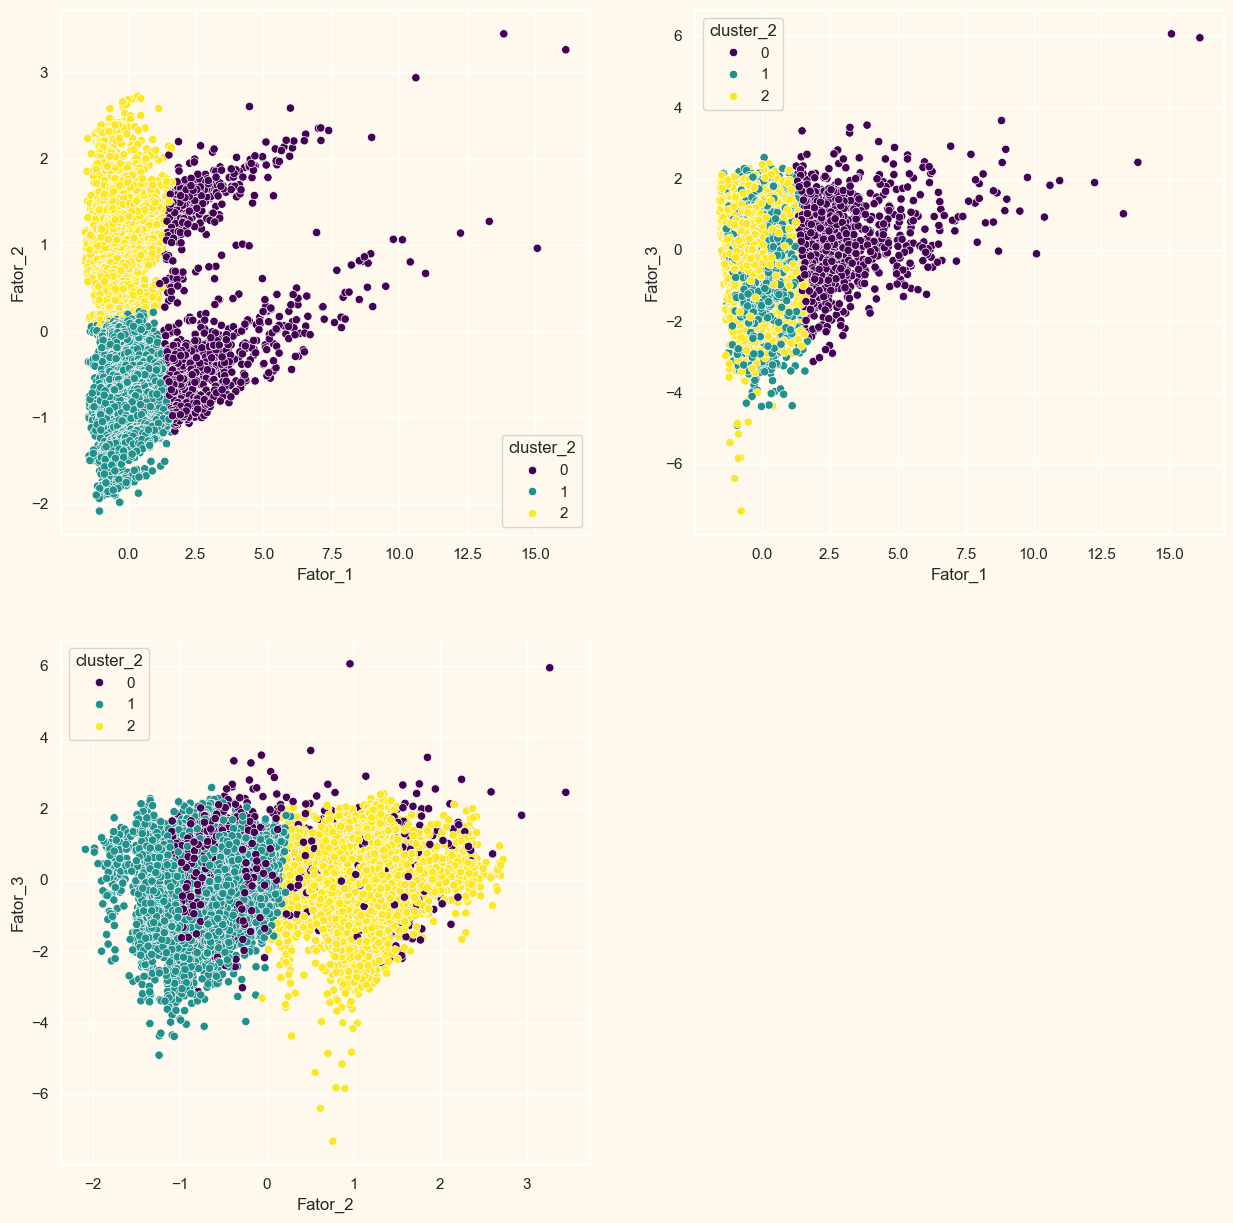

In [54]:
plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
sns.scatterplot(x='Fator_1', y='Fator_2', hue='cluster_2', data=df_cluster_dummy, palette='viridis')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Fator_1', y='Fator_3', hue='cluster_2', data=df_cluster_dummy, palette='viridis')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Fator_2', y='Fator_3', hue='cluster_2', data=df_cluster_dummy, palette='viridis')

# REGRESSÃO LINEAR (OLM)

## OLM - Fatores extraídos PCA

#### Duplicando o dataframe e criando variáveis dummyes

In [55]:
df_agregar = df[['median_house_value', 'ocean_proximity']]
df_pca_fator = df_km[['Fator_1', 'Fator_2', 'Fator_3']]

In [56]:
len(df_pca_fator)

19383

In [57]:
df_olm = pd.concat([df_pca_fator.reset_index(drop=True), df_agregar.reset_index(drop=True)], axis=1)
df_olm = pd.get_dummies(data=df_olm, columns=['ocean_proximity'], drop_first=True)

In [58]:
df_olm

Fator_1   Fator_2   Fator_3  median_house_value  \
0      1.535832  1.402297 -2.353137            358500.0   
1     -0.954545  1.042852 -1.317229            352100.0   
2     -0.949481  1.069792 -0.448314            341300.0   
3     -0.899955  1.109532  0.495446            342200.0   
4     -1.088257  1.071841  0.354539            269700.0   
...         ...       ...       ...                 ...   
19378 -0.554691  1.242605  0.734552             78100.0   
19379 -0.950390  1.180388 -0.217824             77100.0   
19380 -0.249363  1.301146  0.429249             92300.0   
19381 -0.454391  1.292813  0.308183             84700.0   
19382  0.054886  1.328171  0.139429             89400.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
19378                       1                       0   
19379                       1                       0   
19380                       1                       0   
19381                       1                       0   
19382                       1                       0   

       ocean_proximity_NEAR_BAY  ocean_proximity_NEAR_OCEAN  
0                             1                           0  
1                             1                           0  
2                             1                           0  
3                             1                           0  
4                             1                           0  
...                         ...                         ...  
19378                         0                           0  
19379                         0                           0  
19380                         0                           0  
19381                         0                           0  
19382                         0                           0  

[19383 rows x 8 columns]

#### Matriz de correlação

<AxesSubplot:>

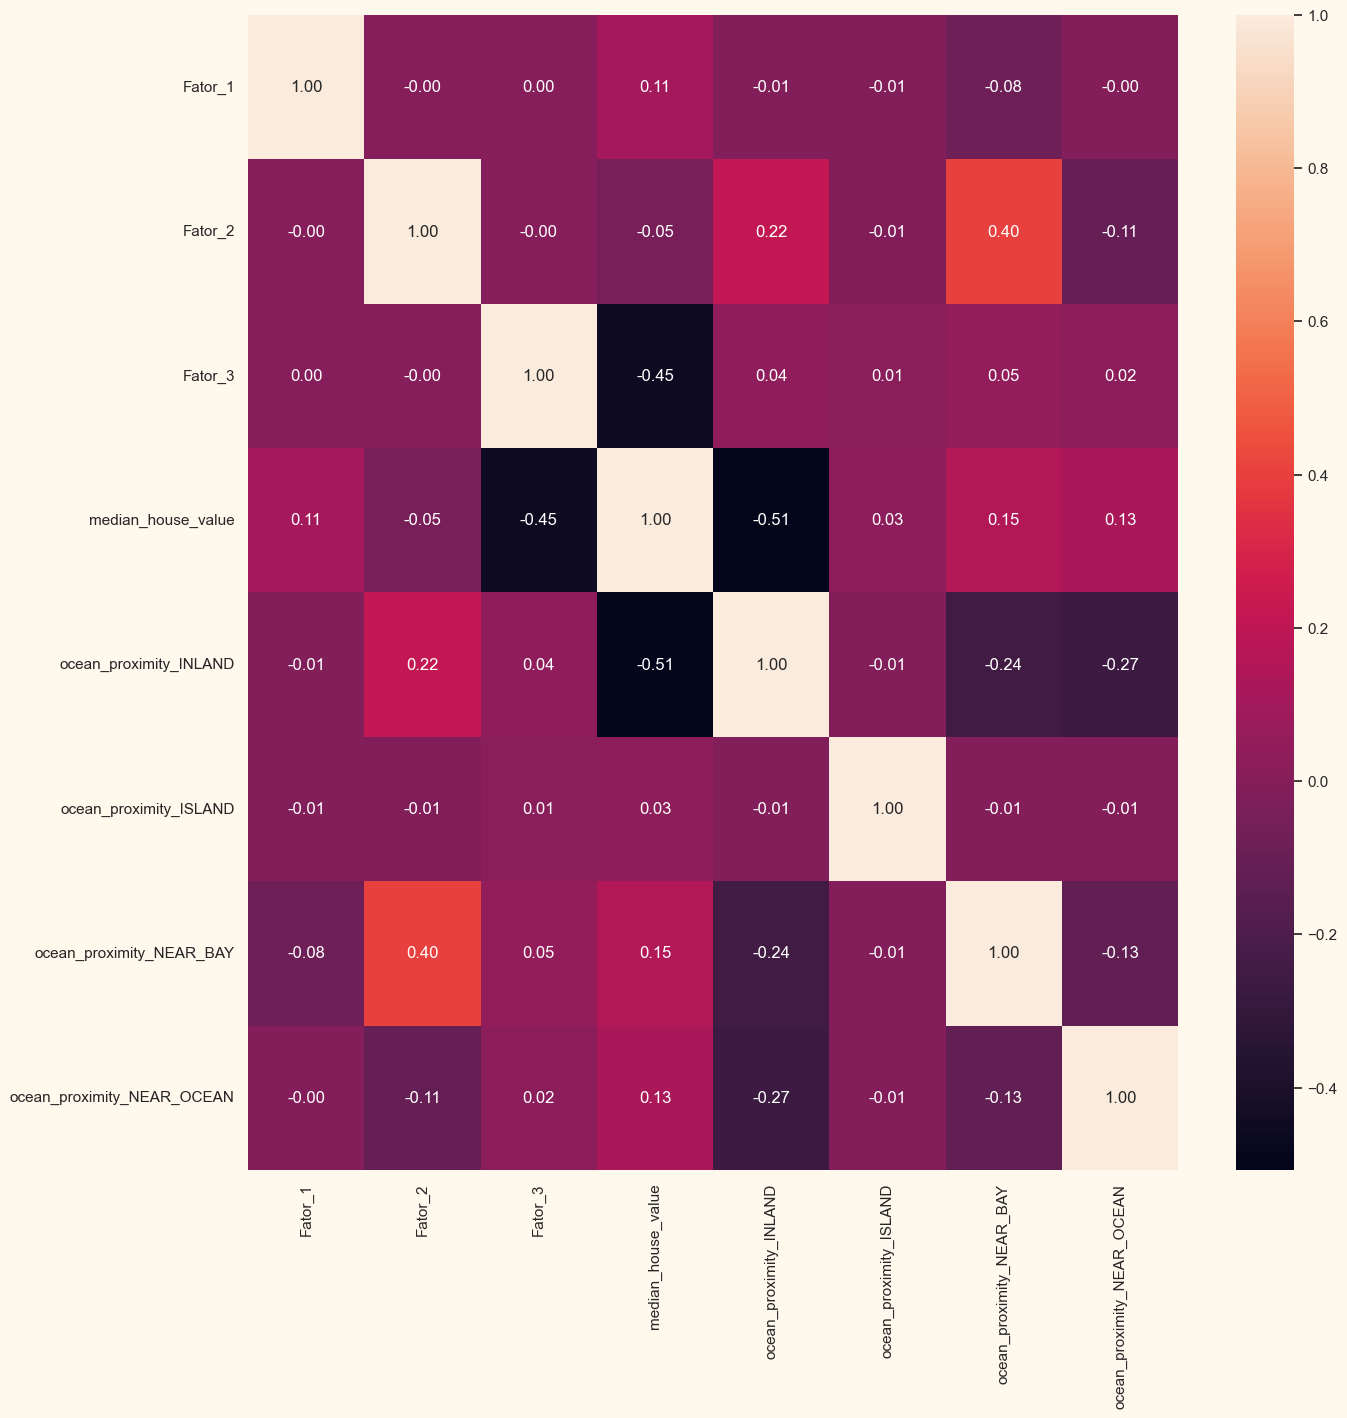

In [59]:
plt.figure(figsize=(15,15))
sns.heatmap(df_olm.corr(), annot=True, fmt='.2f')

#### Procedimento Stepwise

In [60]:
# Estimando o modelo completo
ols_model = sm.OLS.from_formula('median_house_value ~ Fator_1 + Fator_2 + Fator_3 + \
                                ocean_proximity_INLAND + ocean_proximity_ISLAND + \
                                ocean_proximity_NEAR_BAY + ocean_proximity_NEAR_OCEAN', df_olm).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     2413.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:35:51   Log-Likelihood:            -2.4297e+05
No. Observations:               19383   AIC:                         4.860e+05
Df Residuals:                   19375   BIC:                         4.860e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [61]:
ols_model_step = stepwise(ols_model, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 median_house_value ~ Q('Fator_1') + Q('Fator_2') + Q('Fator_3') + Q('ocean_proximity_INLAND') + Q('ocean_proximity_ISLAND') + Q('ocean_proximity_NEAR_BAY') + Q('ocean_proximity_NEAR_OCEAN')

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 


 Model after stepwise process...: 
 median_house_value ~ Q('Fator_1') + Q('Fator_2') + Q('Fator_3') + Q('ocean_proximity_INLAND') + Q('ocean_proximity_ISLAND') + Q('ocean_proximity_NEAR_BAY') + Q('ocean_proximity_NEAR_OCEAN') 

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     2413.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:35:51   Log-Lik

In [62]:
print(ols_model_step.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     2413.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:35:51   Log-Likelihood:            -2.4297e+05
No. Observations:               19383   AIC:                         4.860e+05
Df Residuals:                   19375   BIC:                         4.860e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

#### Teste de verificação de aderência dos resíduos a normalidade

In [63]:
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(ols_model.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9477133208243377
statistics z  :  17.309211921222403
p-value  :  2.0043201113004843e-67
Statistics W=0.94771, p-value=0.000000
Rejeita-se H0 - Distribuição não aderente à normalidade


#### Histograma dos resíduos do modelo

Text(0, 0.5, 'Frequência')

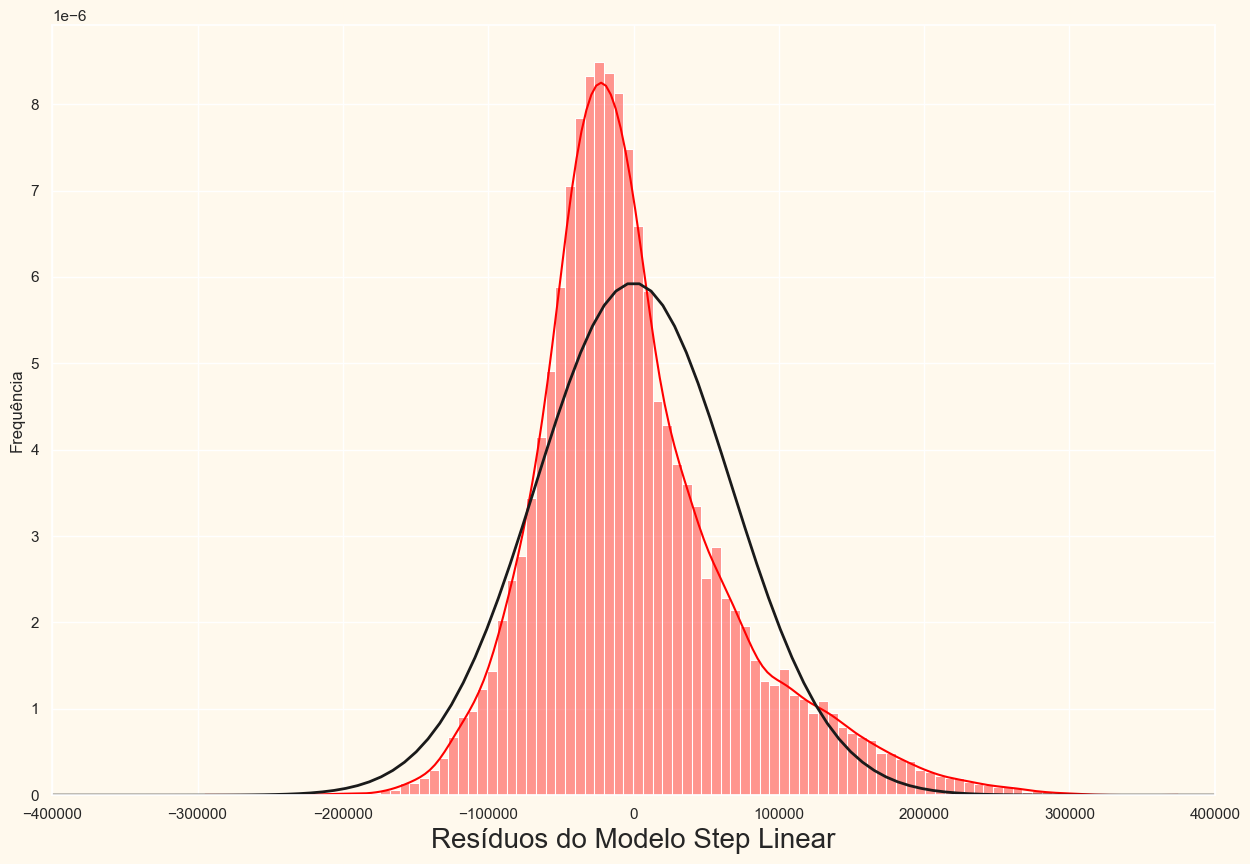

In [64]:
# Calcula os valores de ajuste da distribuição normal
(mu, sigma) = norm.fit(ols_model.resid)

#Gráfico própriamente dito
plt.figure(figsize=(15,10))
sns.histplot(ols_model.resid, bins=100, kde=True, stat='density', color='red', alpha=0.4)

plt.xlim(-400000, 400000, 100)
x = np.linspace(-400000, 400000, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Resíduos do Modelo Step Linear', fontsize=20)
plt.ylabel('Frequência')

#### Diagnóstico de Heterocedasticidade

In [65]:
# Criação da função Breuch pagan para diagnóstico

def breuch_pagan_test(modelo):
    df_ = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
    df_['up'] = (np.square(df_.resid))/np.sum(((np.square(df_.resid))/df_.shape[0]))
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df_).fit()
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    chisq = anova_table['sum_sq'].iloc[0]
    p_value = stats.chi2.pdf(chisq, 1) * 2
    print(f'chisc: {chisq}') 
    print(f'p-value: {p_value}')

    return chisq, p_value

#### Teste Breuch-Pagan

In [66]:
# Presença de heterocedasticidade, ou seja, está faltando variáveis relevantes no modelo

chi2, p = breuch_pagan_test(ols_model)

if p > 0.05:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

chisc: 548.6147146820613
p-value: 2.524263554019224e-121
Rejeita-se H0 - Existência de Heterocedasticidade


#### Adicionando os resíduos do modelo ols_model no df

In [67]:
df_olm['fitted_step'] = ols_model.fittedvalues
df_olm['residuos_step']= ols_model.resid
df_olm

Fator_1   Fator_2   Fator_3  median_house_value  \
0      1.535832  1.402297 -2.353137            358500.0   
1     -0.954545  1.042852 -1.317229            352100.0   
2     -0.949481  1.069792 -0.448314            341300.0   
3     -0.899955  1.109532  0.495446            342200.0   
4     -1.088257  1.071841  0.354539            269700.0   
...         ...       ...       ...                 ...   
19378 -0.554691  1.242605  0.734552             78100.0   
19379 -0.950390  1.180388 -0.217824             77100.0   
19380 -0.249363  1.301146  0.429249             92300.0   
19381 -0.454391  1.292813  0.308183             84700.0   
19382  0.054886  1.328171  0.139429             89400.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
19378                       1                       0   
19379                       1                       0   
19380                       1                       0   
19381                       1                       0   
19382                       1                       0   

       ocean_proximity_NEAR_BAY  ocean_proximity_NEAR_OCEAN    fitted_step  \
0                             1                           0  349056.221033   
1                             1                           0  281278.019768   
2                             1                           0  246163.287072   
3                             1                           0  208492.944769   
4                             1                           0  212227.886370   
...                         ...                         ...            ...   
19378                         0                           0   92704.196501   
19379                         0                           0  127238.089419   
19380                         0                           0  108297.259389   
19381                         0                           0  111161.612693   
19382                         0                           0  123144.936292   

       residuos_step  
0        9443.778967  
1       70821.980232  
2       95136.712928  
3      133707.055231  
4       57472.113630  
...              ...  
19378  -14604.196501  
19379  -50138.089419  
19380  -15997.259389  
19381  -26461.612693  
19382  -33744.936292  

[19383 rows x 10 columns]

#### Relação resíduos vs fitted values

<AxesSubplot:title={'center':'Gráfico de Dispersão entre Resíduos e Fitted Values'}, xlabel='Fitted Values do Modelo Stepwise', ylabel='Resíduos do Modelo Stepwise'>

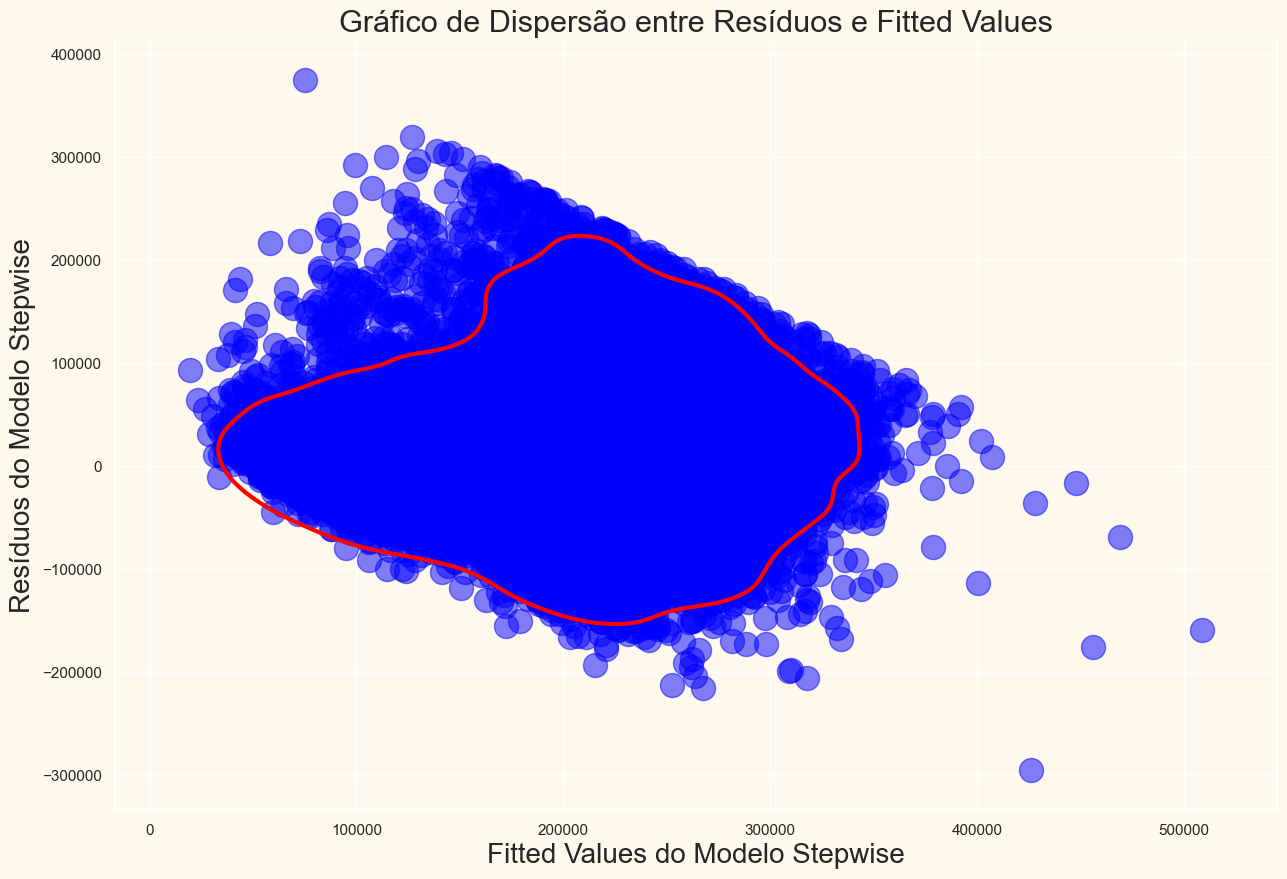

In [68]:
plt.figure(figsize=(15,10))
sns.regplot(x='fitted_step', y='residuos_step', data=df_olm, marker='o', fit_reg=False,
            scatter_kws={'color':'blue', 'alpha':0.5, 's':300})
plt.title('Gráfico de Dispersão entre Resíduos e Fitted Values', fontsize=22)
plt.xlabel('Fitted Values do Modelo Stepwise', fontsize=20)
plt.ylabel('Resíduos do Modelo Stepwise', fontsize=20)

sns.kdeplot(data=df_olm, x='fitted_step', y='residuos_step',
            levels=2, color='red', linewidths=3)

#### Transformação de Box-Cox

In [69]:
# yast é uma variável que traz os valores transformados de y
# lambda é o lambda de box-cox

yast_, lambda_ = boxcox(df_olm['median_house_value'])
print(lambda_)

0.2822871438183245


#### Inserindo o lambda de Box-Cox no dataset para a estimação de um novo modelo

In [70]:
df_olm['bc_median_house_value'] = yast_

In [71]:
df_olm

Fator_1   Fator_2   Fator_3  median_house_value  \
0      1.535832  1.402297 -2.353137            358500.0   
1     -0.954545  1.042852 -1.317229            352100.0   
2     -0.949481  1.069792 -0.448314            341300.0   
3     -0.899955  1.109532  0.495446            342200.0   
4     -1.088257  1.071841  0.354539            269700.0   
...         ...       ...       ...                 ...   
19378 -0.554691  1.242605  0.734552             78100.0   
19379 -0.950390  1.180388 -0.217824             77100.0   
19380 -0.249363  1.301146  0.429249             92300.0   
19381 -0.454391  1.292813  0.308183             84700.0   
19382  0.054886  1.328171  0.139429             89400.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
19378                       1                       0   
19379                       1                       0   
19380                       1                       0   
19381                       1                       0   
19382                       1                       0   

       ocean_proximity_NEAR_BAY  ocean_proximity_NEAR_OCEAN    fitted_step  \
0                             1                           0  349056.221033   
1                             1                           0  281278.019768   
2                             1                           0  246163.287072   
3                             1                           0  208492.944769   
4                             1                           0  212227.886370   
...                         ...                         ...            ...   
19378                         0                           0   92704.196501   
19379                         0                           0  127238.089419   
19380                         0                           0  108297.259389   
19381                         0                           0  111161.612693   
19382                         0                           0  123144.936292   

       residuos_step  bc_median_house_value  
0        9443.778967             127.457051  
1       70821.980232             126.792614  
2       95136.712928             125.651447  
3      133707.055231             125.747526  
4       57472.113630             117.343720  
...              ...                    ...  
19378  -14604.196501              81.657859  
19379  -50138.089419              81.348483  
19380  -15997.259389              85.771912  
19381  -26461.612693              83.631520  
19382  -33744.936292              84.970664  

[19383 rows x 11 columns]

#### Estimando um novo modelo com todas as variáveis e a variável dependente transformada

In [72]:
ols_model_bc = sm.OLS.from_formula('bc_median_house_value ~ Fator_1 + Fator_2 + Fator_3 + \
                                ocean_proximity_INLAND + ocean_proximity_ISLAND + \
                                ocean_proximity_NEAR_BAY + ocean_proximity_NEAR_OCEAN', df_olm).fit()

In [73]:
print(ols_model_bc.summary())

                              OLS Regression Results                             
Dep. Variable:     bc_median_house_value   R-squared:                       0.519
Model:                               OLS   Adj. R-squared:                  0.519
Method:                    Least Squares   F-statistic:                     2985.
Date:                   Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                           20:36:15   Log-Likelihood:                -73319.
No. Observations:                  19383   AIC:                         1.467e+05
Df Residuals:                      19375   BIC:                         1.467e+05
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [74]:
ols_model_bc_step = stepwise(ols_model_bc, pvalue_limit=0.5)

Regression type: OLS 

Estimating model...: 
 bc_median_house_value ~ Q('Fator_1') + Q('Fator_2') + Q('Fator_3') + Q('ocean_proximity_INLAND') + Q('ocean_proximity_ISLAND') + Q('ocean_proximity_NEAR_BAY') + Q('ocean_proximity_NEAR_OCEAN')

 No more atributes with p-value higher than 0.5

 Atributes discarded on the process...: 


 Model after stepwise process...: 
 bc_median_house_value ~ Q('Fator_1') + Q('Fator_2') + Q('Fator_3') + Q('ocean_proximity_INLAND') + Q('ocean_proximity_ISLAND') + Q('ocean_proximity_NEAR_BAY') + Q('ocean_proximity_NEAR_OCEAN') 

                              OLS Regression Results                             
Dep. Variable:     bc_median_house_value   R-squared:                       0.519
Model:                               OLS   Adj. R-squared:                  0.519
Method:                    Least Squares   F-statistic:                     2985.
Date:                   Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                      

#### Teste de verificação da aderência à normalidade dos resíduos

In [75]:
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(ols_model_bc_step.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9863889169030404
statistics z  :  13.61086969576938
p-value  :  1.7255619277995134e-42
Statistics W=0.98639, p-value=0.000000
Rejeita-se H0 - Distribuição não aderente à normalidade


#### Avaliando o modelo com outras métricas

In [76]:
# RMSE = Root Mean Squared Error
rmse = (np.sum((df_olm['fitted_step'] - df_olm['median_house_value'])**2))/len(df_olm)
rmse

4524695886.399293

In [77]:
mape = np.sum(abs((df_olm['median_house_value'] - df_olm['fitted_step'])/df_olm['median_house_value']))/len(df_olm)
mape

0.31470362029005383

### Conclusão, mesmo após a aplicação da transformação Box-Cox, os resíduos continuam não dando aderência a normalidade
### o que é uma premissa básica dos modelos OLS. Dessa forma, seguir com o modelo não garante a confiabilidade dos intervalos de confiança 

## OLM - Sem Fatores extraídos PCA

#### Duplicando o dataset e criando variáveis dummy

In [78]:
df_olm2 = df

In [79]:
df_olm2 = pd.get_dummies(data=df_olm2, columns=['ocean_proximity'], drop_first=True)

#### Definindo um novo modelo

In [80]:
ols_model_2 = sm.OLS.from_formula('median_house_value ~ longitude + housing_median_age + latitude + \
                                  total_rooms + total_bedrooms + ocean_proximity_INLAND + ocean_proximity_ISLAND + \
                                  population + households + ocean_proximity_NEAR_BAY + median_income + \
                                  ocean_proximity_NEAR_OCEAN', df_olm2).fit()

In [81]:
print(ols_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     2548.
Date:                Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                        20:36:16   Log-Likelihood:            -2.3987e+05
No. Observations:               19383   AIC:                         4.798e+05
Df Residuals:                   19370   BIC:                         4.799e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### Incluindo os resíduos e fitted values no dataset

In [82]:
df_olm2['fitted'] = ols_model_2.fittedvalues
df_olm2['resid'] = ols_model_2.resid

#### Verificando o diagnóstico de heterocedasticidade

In [83]:
chi2, p = breuch_pagan_test(ols_model_2)

if p > 0.05:
    print('Não se rejeita H0 - Ausência de Heterocedasticidade')
else:
	print('Rejeita-se H0 - Existência de Heterocedasticidade')

chisc: 541.3388971706644
p-value: 9.65956355243068e-120
Rejeita-se H0 - Existência de Heterocedasticidade


#### Verificando a aderência dos resíduos a normalidade

In [84]:
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(ols_model_2.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.946750855834216
statistics z  :  17.359334703944665
p-value  :  8.382744562825576e-68
Statistics W=0.94675, p-value=0.000000
Rejeita-se H0 - Distribuição não aderente à normalidade


<AxesSubplot:title={'center':'Gráfico de Dispersão entre Resíduos e Fitted Values'}, xlabel='Fitted Values do Modelo Stepwise', ylabel='Resíduos do Modelo Stepwise'>

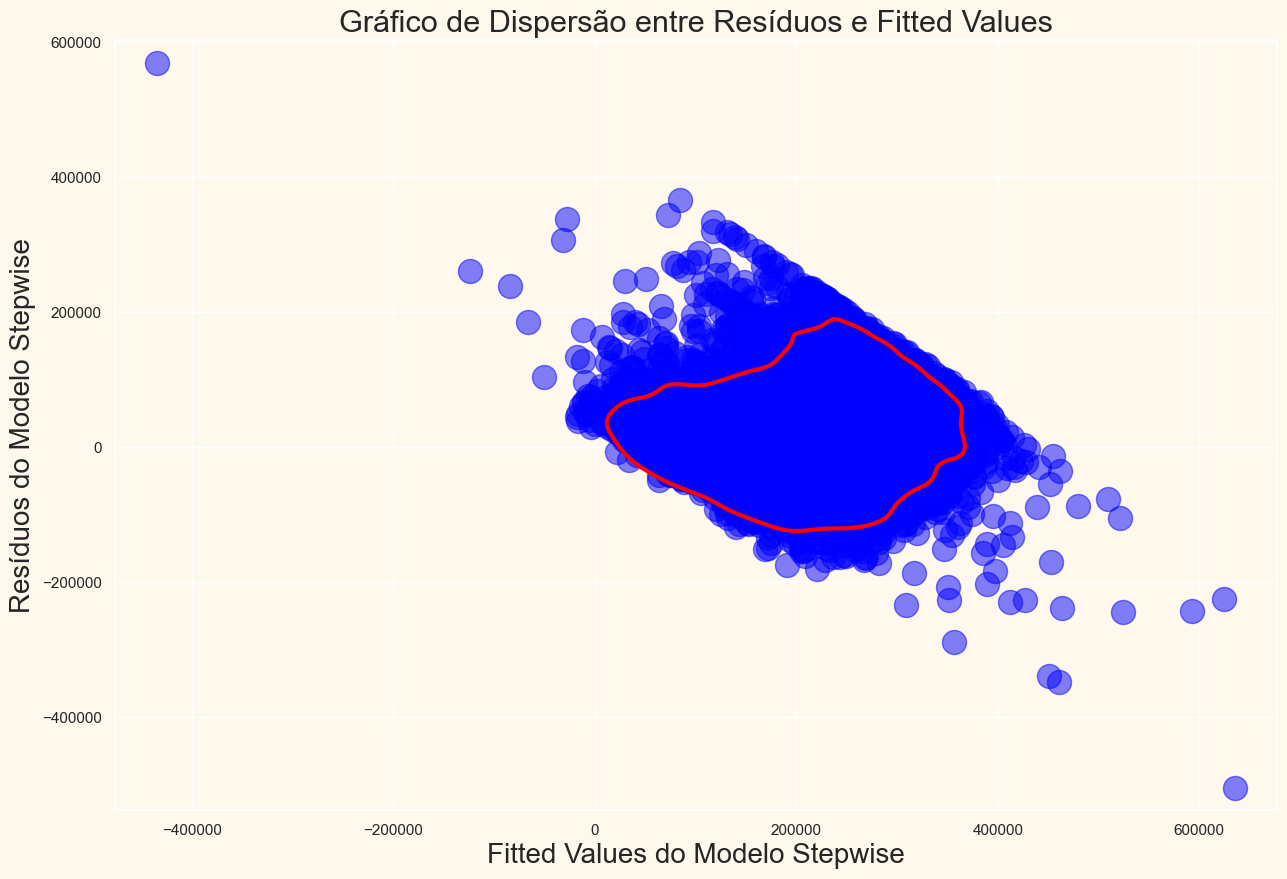

In [85]:
plt.figure(figsize=(15,10))
sns.regplot(x='fitted', y='resid', data=df_olm2, marker='o', fit_reg=False,
            scatter_kws={'color':'blue', 'alpha':0.5, 's':300})
plt.title('Gráfico de Dispersão entre Resíduos e Fitted Values', fontsize=22)
plt.xlabel('Fitted Values do Modelo Stepwise', fontsize=20)
plt.ylabel('Resíduos do Modelo Stepwise', fontsize=20)

sns.kdeplot(data=df_olm2, x='fitted', y='resid',
            levels=2, color='red', linewidths=3)

#### Transformação Box-Cox

In [87]:
yast_, lambda_ = boxcox(df_olm2['median_house_value'])
print(lambda_)

0.2822871438183245


#### Inserindo o lambda de box-cox no dataframe

In [89]:
df_olm2['bc_median_house_value'] = yast_

#### Desenvolvendo um novo modelo

In [93]:
ols_model_2_bc = sm.OLS.from_formula('bc_median_house_value ~ longitude + housing_median_age  + \
                                  total_rooms + total_bedrooms + ocean_proximity_INLAND + ocean_proximity_ISLAND + \
                                  population + households + ocean_proximity_NEAR_BAY + median_income + \
                                  ocean_proximity_NEAR_OCEAN', df_olm2).fit()

In [94]:
print(ols_model_2_bc.summary())

                              OLS Regression Results                             
Dep. Variable:     bc_median_house_value   R-squared:                       0.634
Model:                               OLS   Adj. R-squared:                  0.633
Method:                    Least Squares   F-statistic:                     3046.
Date:                   Mon, 11 Nov 2024   Prob (F-statistic):               0.00
Time:                           20:46:15   Log-Likelihood:                -70676.
No. Observations:                  19383   AIC:                         1.414e+05
Df Residuals:                      19371   BIC:                         1.415e+05
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

#### Teste de verificação de aderência a normalidade dos resíduos

In [95]:
# Teste de Shapiro-Francia: interpretação
teste_sf = shapiro_francia(ols_model_2_bc.resid) #criação do objeto 'teste_sf'
teste_sf = teste_sf.items() #retorna o grupo de pares de valores-chave no dicionário
method, statistics_W, statistics_z, p = teste_sf #definição dos elementos da lista (tupla)
print('Statistics W=%.5f, p-value=%.6f' % (statistics_W[1], p[1]))
alpha = 0.05 #nível de significância
if p[1] > alpha:
	print('Não se rejeita H0 - Distribuição aderente à normalidade')
else:
	print('Rejeita-se H0 - Distribuição não aderente à normalidade')

method  :  Shapiro-Francia normality test
statistics W  :  0.9787402054114395
statistics z  :  14.836270102641958
p-value  :  4.268631861990297e-50
Statistics W=0.97874, p-value=0.000000
Rejeita-se H0 - Distribuição não aderente à normalidade


# MODELAGEM MULTINÍVEL

## ESTIMANDO MODELO SEM ANÁLISE PCA

#### Definindo o dataset

In [171]:
cluster_ = df_cluster_dummy['cluster_2']

df_multinivel_1 = df
df_multinivel_1 = pd.get_dummies(data=df_multinivel_1, columns=['ocean_proximity'], drop_first=True)
df_multinivel_1 = pd.concat([df_multinivel_1.reset_index(drop=True), cluster_.reset_index(drop=True)], axis=1)

#### Definindo o modelo nulo

In [172]:
modelo_nulo_hlm2 = sm.MixedLM.from_formula(formula='median_house_value ~ 1',
                                           groups='population',
                                           re_formula='1',
                                           data=df_multinivel_1).fit()

In [173]:
print(modelo_nulo_hlm2.summary())

                 Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   median_house_value
No. Observations:    19383     Method:               REML              
No. Groups:          3862      Scale:                8465784120.9423   
Min. group size:     1         Log-Likelihood:       -249040.1400      
Max. group size:     24        Converged:            Yes               
Mean group size:     5.0                                               
-----------------------------------------------------------------------
                  Coef.    Std.Err.    z    P>|z|   [0.025     0.975]  
-----------------------------------------------------------------------
Intercept       188225.697  662.076 284.296 0.000 186928.051 189523.343
population Var 3393229.585  324.098                                    



#### Análise da significância estatística dos efeitos aleatórios de intercepto

In [174]:

teste = float(modelo_nulo_hlm2.cov_re.iloc[0, 0]) /\
    float(pd.DataFrame(modelo_nulo_hlm2.summary().tables[1]).iloc[1, 1])

p_value = 2 * (1 - stats.norm.cdf(abs(teste)))

print(f"Estatística z para a Significância dos Efeitos Aleatórios: {teste:.3f}")
print(f"P-valor: {p_value:.3f}")

if p_value >= 0.05:
    print("Ausência de significância estatística dos efeitos aleatórios ao nível de confiança de 95%.")
else:
    print("Efeitos aleatórios contextuais significantes ao nível de confiança de 95%.")

Estatística z para a Significância dos Efeitos Aleatórios: 10469.764
P-valor: 0.000
Efeitos aleatórios contextuais significantes ao nível de confiança de 95%.


#### Definindo um novo modelo

In [177]:
modelo_hlm2 = sm.MixedLM.from_formula(formula='median_house_value ~ longitude + housing_median_age  + \
                                            total_rooms + total_bedrooms + ocean_proximity_INLAND + ocean_proximity_ISLAND + \
                                            population + households + ocean_proximity_NEAR_BAY + median_income + \
                                            ocean_proximity_NEAR_OCEAN',
                                           groups='cluster_2',
                                           re_formula='total_bedrooms',
                                           data=df_multinivel_1).fit()

In [178]:
print(modelo_hlm2.summary())

                           Mixed Linear Model Regression Results
Model:                      MixedLM          Dependent Variable:          median_house_value
No. Observations:           19383            Method:                      REML              
No. Groups:                 3                Scale:                       3362959529.7544   
Min. group size:            1254             Log-Likelihood:              -240049.8410      
Max. group size:            10375            Converged:                   No                
Mean group size:            6461.0                                                          
--------------------------------------------------------------------------------------------
                                   Coef.      Std.Err.    z    P>|z|    [0.025      0.975]  
--------------------------------------------------------------------------------------------
Intercept                        -578105.416 59108.003  -9.780 0.000 -693954.972 -462255.860
longi

In [135]:
df_multinivel_1

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
5        -122.25     37.85                52.0        919.0           213.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
5           413.0       193.0         4.0368            269700.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
5                           0                       0   
...                       ...                     ...   
20635                       1                       0   
20636                       1                       0   
20637                       1                       0   
20638                       1                       0   
20639                       1                       0   

       ocean_proximity_NEAR_BAY  ocean_proximity_NEAR_OCEAN  
1                             1                           0  
2                             1                           0  
3                             1                           0  
4                             1                           0  
5                             1                           0  
...                         ...                         ...  
20635                         0                           0  
20636                         0                           0  
20637                         0                           0  
20638                         0                           0  
20639                         0                           0  

[19383 rows x 13 columns]

## ESTIMANDO MODELO COM ANÁLISE PCA

#### Definindo o dataframe

In [111]:
df_multinivel = df_olm.drop(columns=['fitted_step','residuos_step','bc_median_house_value'], axis=1)
df_multinivel = pd.concat([df_multinivel, df_km['cluster_1']], axis=1)

#### Estimando o modelo nulo

In [112]:
#Estimação do modelo nulo (função 'MixedLM' do pacote 'statsmodels')

modelo_nulo_hlm2_pca = sm.MixedLM.from_formula(formula='median_house_value ~ 1',
                                           groups='cluster_1',
                                           re_formula='1',
                                           data=df_multinivel).fit()

In [113]:
print(modelo_nulo_hlm2_pca.summary())

                 Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   median_house_value
No. Observations:    19383     Method:               REML              
No. Groups:          3         Scale:                8424580861.5084   
Min. group size:     1260      Log-Likelihood:       -248992.9730      
Max. group size:     10340     Converged:            Yes               
Mean group size:     6461.0                                            
-----------------------------------------------------------------------
                  Coef.     Std.Err.   z    P>|z|   [0.025     0.975]  
-----------------------------------------------------------------------
Intercept        191467.738 6191.992 30.922 0.000 179331.656 203603.819
cluster_1 Var 112143169.110 1263.882                                   



#### Análise da significância estatística dos efeitos aleatórios de intercepto

In [114]:

teste = float(modelo_nulo_hlm2_pca.cov_re.iloc[0, 0]) /\
    float(pd.DataFrame(modelo_nulo_hlm2_pca.summary().tables[1]).iloc[1, 1])

p_value = 2 * (1 - stats.norm.cdf(abs(teste)))

print(f"Estatística z para a Significância dos Efeitos Aleatórios: {teste:.3f}")
print(f"P-valor: {p_value:.3f}")

if p_value >= 0.05:
    print("Ausência de significância estatística dos efeitos aleatórios ao nível de confiança de 95%.")
else:
    print("Efeitos aleatórios contextuais significantes ao nível de confiança de 95%.")

Estatística z para a Significância dos Efeitos Aleatórios: 88729.145
P-valor: 0.000
Efeitos aleatórios contextuais significantes ao nível de confiança de 95%.


#### Estimando um novo modelo

In [125]:
modelo_hlm2 = sm.MixedLM.from_formula(formula='median_house_value ~ Fator_1 + Fator_2 + Fator_3 + \
                                           ocean_proximity_INLAND + ocean_proximity_ISLAND + ocean_proximity_NEAR_BAY + \
                                           ocean_proximity_NEAR_OCEAN',
                                           groups='cluster_1',
                                           re_formula='Fator_2',
                                           data=df_multinivel).fit()

In [126]:
print(modelo_hlm2.summary())

                        Mixed Linear Model Regression Results
Model:                    MixedLM        Dependent Variable:        median_house_value
No. Observations:         19383          Method:                    REML              
No. Groups:               3              Scale:                     4464402690.3254   
Min. group size:          1260           Log-Likelihood:            -242781.7740      
Max. group size:          10340          Converged:                 Yes               
Mean group size:          6461.0                                                      
--------------------------------------------------------------------------------------
                               Coef.      Std.Err.    z    P>|z|   [0.025     0.975]  
--------------------------------------------------------------------------------------
Intercept                     231017.647  5082.642  45.452 0.000 221055.851 240979.442
Fator_1                         8238.082   733.619  11.229 0.000   6